# Laboratorio 2

### Author: David Alexander Rativa Gutierrez

In [25]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00


In [26]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [7]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [8]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [9]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [10]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [11]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [12]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [13]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [14]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [15]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [16]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [17]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [18]:
philosophers = {
    'Bertrand': 'Russell',
    'Immanuel': 'Kant',
    'Friedrich': 'Nietzsche',
    'Søren': 'Kierkegaard',
    'Plato': 'Plato'
}

selected_philosophers = {}
for key in philosophers:
    if 'Bertrand' <= key <= 'Immanuel':
        selected_philosophers[key] = philosophers[key]

print(selected_philosophers)


{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Friedrich': 'Nietzsche'}


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [21]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [22]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [23]:
%%time

matmul(a, b)

CPU times: user 34 µs, sys: 1 µs, total: 35 µs
Wall time: 38.4 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [22]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [18]:
import numpy as np

In [17]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):      # Acá se cambia el numero de filas de B por las columnas de A
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [25]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):      # Acá se cambia el numero de filas de B por las columnas de A
                out[i][j] += A[i][k] * B[k][j]
    return out

A = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

B = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

result = matmul(A, B)
print(result)


IndexError: ignored

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [16]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if len(A[0]) == len(B):
      for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  ## == len(B)):      # Acá se cambia la condición para verificar si se cumple la condición len(A[0] == len(B))
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [15]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0]) == len(B)):      # Acá se cambia la condición para verificar si se cumple la condición len(A[0] == len(B))
                out[i][j] += A[i][k] * B[k][j]
                return out

A = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

B = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

result = matmul(A, B)
if result is None:
  print("The result is",result,"because array are not compatible")
else:
  print(result)

The result is None because array are not compatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [14]:
import numpy as np

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0]) == len(B)):      # Acá se cambia la condición para verificar si se cumple la condición len(A[0] == len(B))
                out[i][j] += A[i][k] * B[k][j]
                return out

# Matrices compatibles para la multiplicación
A = np.random.random((3, 4))
B = np.random.random((4, 5))

if matmul(A, B):
    print("Matrices A and B are compatible for multiplication:")
    print("A:", A)
    print("B:", B)
else:
    print("Matrices A and B are not compatible for multiplication")


Matrices A and B are compatible for multiplication:
A: [[0.48044012 0.32989269 0.40522874 0.14709423]
 [0.01793713 0.97976132 0.44435907 0.06408201]
 [0.35541726 0.86319967 0.62959268 0.58250312]]
B: [[0.90795875 0.91122161 0.3351769  0.23033277 0.48241212]
 [0.06425526 0.05335609 0.35684264 0.93484047 0.44351776]
 [0.18464141 0.5440345  0.32040986 0.94172084 0.24553572]
 [0.14517674 0.77227066 0.16364862 0.92495133 0.73609602]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [13]:
%%time

matmul: (A,B)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [1]:
## Code extracted and modified from: Quantopian and ChatGPT

import random
import time

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

# Funcion que genera las matrices aleatorias

def generate_random_matrix(rows, cols):
    return [[random.randint(1, 10) for _ in range(cols)] for _ in range(rows)]

# Variable que indica la cantidad de ejecuciones de la multiplicación (10)
num_runs = 10

# Tamaño de las matrices
rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600

total_time = 0

# Por cada iteración, genera dos matrices aleatorias y llama a la función matmul para multiplicarlas.
# Llama a la librería time para registrar los tiempos, hace la diferencia y los imprime.

for run in range(num_runs):
    A = generate_random_matrix(rows_a, cols_a)
    B = generate_random_matrix(rows_b, cols_b)

    start_time = time.time()
    result = matmul(A, B)
    end_time = time.time()

    execution_time = end_time - start_time
    total_time += execution_time

    print(f"Iteration {run + 1}: Execution time: {execution_time:.6f} seconds")

average_execution_time = total_time / num_runs

print(f"Average Python execution time over {num_runs} runs: {average_execution_time:.6f} seconds")






Iteration 1: Execution time: 8.846712 seconds
Iteration 2: Execution time: 8.767497 seconds
Iteration 3: Execution time: 7.328206 seconds
Iteration 4: Execution time: 8.688704 seconds
Iteration 5: Execution time: 8.736043 seconds
Iteration 6: Execution time: 7.242010 seconds
Iteration 7: Execution time: 8.779651 seconds
Iteration 8: Execution time: 9.281688 seconds
Iteration 9: Execution time: 7.987205 seconds
Iteration 10: Execution time: 8.755372 seconds
Average Python execution time over 10 runs: 8.441309 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [2]:
# Crea un DataFrame para ir registrando los datos de los lenguajes y el tiempo que tardan en hacer la multiplicación de matrices.

import pandas as pd

execution_time = pd.DataFrame({"Language": [],"Average": []})

In [3]:
# Funcion que cada vez que se llama añade los valores al DataFrame

def add_execution_time(language, average):
    global execution_time
    execution_time = pd.concat([execution_time, pd.DataFrame({"Language": [language],"Average": [average]})], ignore_index=True)
    return execution_time

In [4]:
# Añade al DataFrame el tiempo de Python

add_execution_time("Python", average_execution_time)

,Language,Average
0,Python,8.441309


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [6]:
# Code extracted and modified from: ChatGPT

import numpy as np
import time

# Numero de veces que Numpy hará la iteración
num_runs = 10

# Tamaño de las matrices
rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600
total_time_numpy = 0

# Por cada iteración, toma dos matrices aleatorias y les asigna el tamaño según sea el caso.

for run in range(num_runs):
    A = generate_random_matrix(rows_a, cols_a)
    B = generate_random_matrix(rows_b, cols_b)

# Llama a la función matmul para hacer la multiplicación de las matrices que tomó anteriormente, mide su tiempo, hace la diferencia e imprime el resultado.
    start_time = time.time()
    result_numpy = np.matmul(A, B)
    end_time = time.time()
    execution_time_numpy = end_time - start_time
    total_time_numpy += execution_time_numpy

    print(f"Iteration {run + 1} execution time: {execution_time_numpy:.6f} seconds")

average_execution_time_numpy = total_time_numpy / num_runs

print(f"Average execution time (NumPy) over {num_runs} runs: {average_execution_time_numpy:.6f} seconds")


Iteration 1 execution time: 0.048990 seconds
Iteration 2 execution time: 0.048119 seconds
Iteration 3 execution time: 0.053368 seconds
Iteration 4 execution time: 0.048339 seconds
Iteration 5 execution time: 0.048383 seconds
Iteration 6 execution time: 0.051276 seconds
Iteration 7 execution time: 0.055134 seconds
Iteration 8 execution time: 0.045423 seconds
Iteration 9 execution time: 0.047117 seconds
Iteration 10 execution time: 0.058534 seconds
Average execution time (NumPy) over 10 runs: 0.050468 seconds


In [7]:
# Añade el tiempo de ejecución de Numpy al DataFrame

add_execution_time("Numpy", average_execution_time_numpy)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468


In [8]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [27]:
%%fortran

subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [10]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [11]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 21 ms


333328333350000.0

In [28]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 273 µs, sys: 0 ns, total: 273 µs
Wall time: 293 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [29]:
A = [[2560, 4602],
     [8469, 7895]]
B = [[4564, 1005],
     [5465, 1346]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [30]:
%%fortran

    ! Code extracted and modified from: Quantopian and ChatGPT


subroutine matmulFortran(A, B, C)

    ! Multiplica la matriz A por la matriz B para obtener la matriz C (2x2 matrices)

    real*8 :: A(2, 2)
    real*8 :: B(2, 2)
    real*8,intent(out) :: C(2, 2)

    integer :: i, j, k

    ! Realiza la multiplicación

    do i = 1, 2
        do j = 1, 2
            C(i, j) = 0.0
            do k = 1, 2
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmulFortran



**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [31]:
C = [[5,5],[9,9]]
D = [[5,5],[9,9]]
print(C)
print(D)

matmulfortran(C,D)


[[5, 5], [9, 9]]
[[5, 5], [9, 9]]


array([[ 70.,  70.],
       [126., 126.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [45]:
%%fortran

    ! Code extracted and modified from: Quantopian and ChatGPT

subroutine matmul_fortran_600(A, B, C)

    ! Multiplica la matriz A por la matriz B para obtener la matriz C (600x100 y 100x600 matrices)

    real*8 :: A(600, 100)
    real*8 :: B(100, 600)
    real*8,intent (out) :: C(600,600)
    integer :: i, j, k

    ! Realiza la multiplicación

    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul_fortran_600


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [46]:
import numpy as np

rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600

# Llama a las matrices A y B anteriormente declaradas

A = generate_random_matrix(rows_a, cols_a)
B = generate_random_matrix(rows_b, cols_b)

# Toma las matrices A y B declaradas anteriormente, llama a la funcion matmul e imprime el resultado
matrix_a = np.array(A)
matrix_b = np.array(B)

matmul_fortran_600 (matrix_a, matrix_b)





array([[2859., 2837., 3031., ..., 3036., 2921., 2771.],
       [3342., 3599., 3563., ..., 3425., 3425., 3153.],
       [2788., 3182., 3093., ..., 3105., 2906., 2843.],
       ...,
       [3092., 3210., 3308., ..., 3176., 3133., 2992.],
       [2898., 3226., 3331., ..., 3131., 3210., 2916.],
       [2729., 2977., 3254., ..., 3076., 3103., 2735.]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [47]:
import time

# Tamaño de las filas y columnas de 600x100 y 100x600 respectivamente
rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600

# Llama a las matrices A y B anteriormente declaradas

for i in range(10):
    A = generate_random_matrix(rows_a, cols_a)
    B = generate_random_matrix(rows_b, cols_b)

# Calcula el tiempo de la operacion, hace la diferencia entre el tiempo inicial y el tiempo final y lo imprime

    start = time.perf_counter()
    matmul_fortran_600(A, B)
    end = time.perf_counter()

    test.append(end - start)
    print(f"Iteration {i+1}: {test[-1]:.04f} seconds")

fortran_magic_average = sum(test) / 10
print(f"Fortran Magic average: {fortran_magic_average:.04f} seconds")



Iteration 1: 0.0576 seconds
Iteration 2: 0.0639 seconds
Iteration 3: 0.0592 seconds
Iteration 4: 0.0554 seconds
Iteration 5: 0.0549 seconds
Iteration 6: 0.0610 seconds
Iteration 7: 0.0540 seconds
Iteration 8: 0.0545 seconds
Iteration 9: 0.0644 seconds
Iteration 10: 0.0542 seconds
Fortran Magic average: 0.1205 seconds


In [48]:
# Añade el tiempo de ejecución de Fortran al DataFrame

add_execution_time("Fortran Magic", fortran_magic_average)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [73]:
import time

test = []

rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600

def fortran_ten_times(A, B):
# Para cada iteracion en el rango de 0 a 10, realiza las multiplicaciones de A y B y calcula el tiempo
    for i in range(10):
      A = generate_random_matrix(rows_a, cols_a)
      B = generate_random_matrix(rows_b, cols_b)

      start = time.perf_counter()
      matmul_fortran_600(A, B)
      end = time.perf_counter()
      test.append(end - start)
      print(f"Iteration {i+1}: {test[-1]:.04f} seconds")

Fortran 10 times average: 0.0000 seconds


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [75]:
%%time

fortran_ten_times(600, 100)

fortran_10_times_average = sum(test) / 10
print(f"Fortran 10 times average: {fortran_10_times_average:.04f} seconds")


Iteration 1: 0.0824 seconds
Iteration 2: 0.0816 seconds
Iteration 3: 0.0785 seconds
Iteration 4: 0.0899 seconds
Iteration 5: 0.1077 seconds
Iteration 6: 0.0537 seconds
Iteration 7: 0.0528 seconds
Iteration 8: 0.0542 seconds
Iteration 9: 0.0538 seconds
Iteration 10: 0.0579 seconds
Fortran 10 times average: 0.1383 seconds
CPU times: user 2.11 s, sys: 14.5 ms, total: 2.13 s
Wall time: 2.4 s


**My own example 18 - Adding Fortran average execution time to the data frame**

In [76]:
add_execution_time("Fortran 10 times",fortran_10_times_average)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510
4,Fortran 10 times,0.138294


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [106]:
%%writefile multiplicacion.c

/*Code extracted and modified from: Quantopian and ChatGPT*/

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void mat_mul_c(double matrix_A[600][100], double matrix_B[100][600], double result[600][600]) {
    for (int x = 0; x < 600; x++) {
        for (int y = 0; y < 600; y++) {
            result[x][y] = 0.0;
            for (int z = 0; z < 100; z++) {
                result[x][y] += matrix_A[x][z] * matrix_B[z][y];
            }
        }
    }
}

int main() {
    double matrix_A[600][100];
    double matrix_B[100][600];
    double result[600][600];
    clock_t start_time, end_time;

    // Inicializar matrices A y B con valores de ejemplo
    for (int i = 0; i < 600; i++) {
        for (int j = 0; j < 100; j++) {
            matrix_A[i][j] = 1.0;
            matrix_B[j][i] = 2.0;
        }
    }

    double total_time = 0.0;

    // Realizar la multiplicación 10 veces
    for (int i = 0; i < 10; i++) {
        start_time = clock();

        mat_mul_c(matrix_A, matrix_B, result);

        end_time = clock();
        double elapsed_time = (double)(end_time - start_time) / CLOCKS_PER_SEC;
        printf("Iteration %d: %.4f seconds\n", i + 1, elapsed_time);

        total_time += elapsed_time;
    }

    double average_time = total_time / 10.0;
    printf("Average C execution time: %.4f seconds\n", average_time);

    // Guardar el tiempo promedio en un archivo
    FILE *file = fopen("average_c.txt", "w");
    if (file != NULL) {
        fprintf(file, "%.4f", average_time);
        fclose(file);
        printf("Average time saved to average_c.txt\n");
    } else {
        printf("Error opening file for writing.\n");
    }

    return 0;
}


Overwriting multiplicacion.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [107]:
!gcc  multiplicacion.c -o  Multiplicacion
!./Multiplicacion


Iteration 1: 0.2078 seconds
Iteration 2: 0.1965 seconds
Iteration 3: 0.2028 seconds
Iteration 4: 0.1980 seconds
Iteration 5: 0.3057 seconds
Iteration 6: 0.3491 seconds
Iteration 7: 0.3515 seconds
Iteration 8: 0.3588 seconds
Iteration 9: 0.3584 seconds
Iteration 10: 0.3566 seconds
Average C execution time: 0.2885 seconds
Average time saved to average_c.txt


**My own example 21 - Adding c average execution time to the data frame**

In [86]:
mat_mul_c = open('average_c.txt', 'r')
average_c = float(mat_mul_c.readline())
add_execution_time("C", average_c)




,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510
4,Fortran 10 times,0.138294
5,C,0.194300


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [87]:
%%writefile multiplicacion.cpp

/*Code extracted and modified from: Quantopian and ChatGPT*/


#include <iostream>
#include <fstream>
#include <ctime>

void mat_mul_cpp(double matrix_A[600][100], double matrix_B[100][600], double result[600][600]) {
    for (int x = 0; x < 600; x++) {
        for (int y = 0; y < 600; y++) {
            result[x][y] = 0.0;
            for (int z = 0; z < 100; z++) {
                result[x][y] += matrix_A[x][z] * matrix_B[z][y];
            }
        }
    }
}

int main() {
    std::ofstream file("average_cpp.txt");
    double matrix_A[600][100];
    double matrix_B[100][600];
    double result[600][600];
    clock_t start_time, end_time;
    double test[10];
    double cpp_average = 0.0;

    // Inicializar matrices A y B con valores de ejemplo
    for (int i = 0; i < 600; i++) {
        for (int j = 0; j < 100; j++) {
            matrix_A[i][j] = 1.0;
            matrix_B[j][i] = 2.0;
        }
    }

    // Realizar la multiplicación 10 veces y medir el tiempo
    for (int i = 0; i < 10; i++) {
        start_time = clock();

        mat_mul_cpp(matrix_A, matrix_B, result);

        end_time = clock();
        double elapsed_time = static_cast<double>(end_time - start_time) / CLOCKS_PER_SEC;
        test[i] = elapsed_time;
        std::cout << "Case " << i + 1 << ": " << elapsed_time << " seconds" << std::endl;
    }

    // Calcular el tiempo promedio en C++
    for (int i = 0; i < 10; i++) {
        cpp_average += test[i];
    }
    cpp_average /= 10;

    // Guardar el tiempo promedio en un archivo
    file << cpp_average;
    file.close();

    std::cout << "C++ average: " << cpp_average << " seconds" << std::endl;

    return 0;
}


Writing multiplicacion.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [88]:
!g++ multiplicacion.cpp -o Multiplicacion_CPP
!./Multiplicacion_CPP

Case 1: 0.183313 seconds
Case 2: 0.181684 seconds
Case 3: 0.193272 seconds
Case 4: 0.179908 seconds
Case 5: 0.215492 seconds
Case 6: 0.192291 seconds
Case 7: 0.184952 seconds
Case 8: 0.175141 seconds
Case 9: 0.187569 seconds
Case 10: 0.19833 seconds
C++ average: 0.189195 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [89]:
mat_mul_cpp = open('average_cpp.txt', 'r')
average_cpp = float(mat_mul_cpp.readline())
add_execution_time("C++", average_cpp)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510
4,Fortran 10 times,0.138294
5,C,0.194300
6,C++,0.189195


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [94]:
%%writefile MatrixMultiplication.java

// Code extracted and modified from: Quantopian and ChatGPT

import java.io.FileWriter;
import java.io.IOException;
import java.util.Random;

public class MatrixMultiplication {
    public static void main(String[] args) {
        int rowsA = 600;
        int colsA = 100;
        int rowsB = 100;
        int colsB = 600;

        double[][] matrixA = generateRandomMatrix(rowsA, colsA);
        double[][] matrixB = generateRandomMatrix(rowsB, colsB);

        double[] executionTimes = new double[10];

        for (int i = 0; i < 10; i++) {
            long startTime = System.nanoTime();

            double[][] result = matrixMultiplication(matrixA, matrixB);

            long endTime = System.nanoTime();
            double elapsedTime = (endTime - startTime) / 1e9; // Convert to seconds
            executionTimes[i] = elapsedTime;

            System.out.println("Case " + (i + 1) + ": " + elapsedTime + " seconds");
        }

        double averageTime = calculateAverage(executionTimes);
        System.out.println("Average execution time Java: " + averageTime + " seconds");

        saveExecutionTimes(executionTimes, "tiempojava.txt");
    }

    public static double[][] generateRandomMatrix(int rows, int cols) {
        double[][] matrix = new double[rows][cols];
        Random rand = new Random();

        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextDouble();
            }
        }

        return matrix;
    }

    public static double[][] matrixMultiplication(double[][] matrixA, double[][] matrixB) {
        int rowsA = matrixA.length;
        int colsA = matrixA[0].length;
        int rowsB = matrixB.length;
        int colsB = matrixB[0].length;

        double[][] result = new double[rowsA][colsB];

        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsB; j++) {
                for (int k = 0; k < colsA; k++) {
                    result[i][j] += matrixA[i][k] * matrixB[k][j];
                }
            }
        }

        return result;
    }

     public static double calculateAverage(double[] numbers) {
        double sum = 0;
        for (double num : numbers) {
            sum += num;
        }
        return sum / numbers.length;
    }

    public static void saveExecutionTimes(double[] times, String filename) {
        try {
            FileWriter writer = new FileWriter(filename);
            for (double time : times) {
                writer.write(time + "\n");
            }
            writer.close();
            System.out.println("Execution times saved to " + filename);
        } catch (IOException e) {
            e.printStackTrace();
        }
    }
}


Overwriting MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [95]:
!javac MatrixMultiplication.java

In [96]:
!java MatrixMultiplication

Case 1: 0.168380381 seconds
Case 2: 0.142616817 seconds
Case 3: 0.077743661 seconds
Case 4: 0.130269512 seconds
Case 5: 0.135655106 seconds
Case 6: 0.151549606 seconds
Case 7: 0.134495625 seconds
Case 8: 0.129329593 seconds
Case 9: 0.134321654 seconds
Case 10: 0.070548377 seconds
Average execution time Java: 0.1274910332 seconds
Execution times saved to tiempojava.txt


**My own example 27 - Adding Java average execution time to the data frame**

In [97]:
mat_mul_java = open("tiempojava.txt", "r")
average_java = float(mat_mul_java.readline())
add_execution_time("Java", average_java)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510
4,Fortran 10 times,0.138294
5,C,0.194300
6,C++,0.189195
7,Java,0.168380


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [98]:
%%writefile multiplicacionJS.js

// Extracted from: ChatGPT

function generateRandomMatrix(rows, cols) {
    const matrix = [];
    for (let i = 0; i < rows; i++) {
        const row = [];
        for (let j = 0; j < cols; j++) {
            row.push(Math.random());
        }
        matrix.push(row);
    }
    return matrix;
}

function matrixMultiplication(matrixA, matrixB) {
    const rowsA = matrixA.length;
    const colsA = matrixA[0].length;
    const rowsB = matrixB.length;
    const colsB = matrixB[0].length;

    const result = [];

    for (let i = 0; i < rowsA; i++) {
        const row = [];
        for (let j = 0; j < colsB; j++) {
            let sum = 0;
            for (let k = 0; k < colsA; k++) {
                sum += matrixA[i][k] * matrixB[k][j];
            }
            row.push(sum);
        }
        result.push(row);
    }

    return result;
}

function calculateAverage(numbers) {
    const sum = numbers.reduce((total, num) => total + num, 0);
    return sum / numbers.length;
}

function saveExecutionTimes(times, filename) {
    const fs = require('fs');
    const data = times.join('\n');
    fs.writeFileSync(filename, data);
    console.log(`Execution times saved to ${filename}`);
}

const rowsA = 600;
const colsA = 100;
const rowsB = 100;
const colsB = 600;

const executionTimes = [];

for (let i = 0; i < 10; i++) {
    const matrixA = generateRandomMatrix(rowsA, colsA);
    const matrixB = generateRandomMatrix(rowsB, colsB);

    const startTime = Date.now();
    const result = matrixMultiplication(matrixA, matrixB);
    const endTime = Date.now();
    const elapsedTime = (endTime - startTime) / 1000; // Convert to seconds
    executionTimes.push(elapsedTime);

    console.log(`Case ${i + 1}: ${elapsedTime} seconds`);
}

const averageTime = calculateAverage(executionTimes);
console.log(`Average execution time JavaScript: ${averageTime} seconds`);

saveExecutionTimes(executionTimes, 'tiempojs.txt');


Writing multiplicacionJS.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [99]:
!node multiplicacionJS.js

Case 1: 0.165 seconds
Case 2: 0.159 seconds
Case 3: 0.172 seconds
Case 4: 0.133 seconds
Case 5: 0.134 seconds
Case 6: 0.132 seconds
Case 7: 0.137 seconds
Case 8: 0.15 seconds
Case 9: 0.126 seconds
Case 10: 0.136 seconds
Average execution time JavaScript: 0.1444 seconds
Execution times saved to tiempojs.txt


**My own example 30 - Adding Javascript average execution time to the data frame**

In [100]:
mat_mul_js = open("tiempojs.txt", "r")
average_js = float(mat_mul_js.readline())
add_execution_time("JavaScript", average_js)

,Language,Average
0,Python,8.441309
1,Numpy,0.050468
2,Fortran Magic,0.062600
3,Fortran Magic,0.120510
4,Fortran 10 times,0.138294
5,C,0.194300
6,C++,0.189195
7,Java,0.168380
8,JavaScript,0.165000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [101]:
tiempoMinimo = execution_time ['Average'].min()
tiempoMinimo

0.05046820640563965

**My own example 32 - Adding the Speed factor columne to the data frame**

In [102]:
velocidad = []
for i in range (len(execution_time)):
  velocidad.append(execution_time['Average'].iloc[i]/tiempoMinimo)
execution_time['Speed']= velocidad

**My own example 33 - Sorting the the data frame by average execution time**

In [103]:
execution_time.sort_values(by=['Average'],inplace = True)
execution_time

,Language,Average,Speed
1,Numpy,0.050468,1.000000
2,Fortran Magic,0.062600,1.240392
3,Fortran Magic,0.120510,2.387842
4,Fortran 10 times,0.138294,2.740229
8,JavaScript,0.165000,3.269385
7,Java,0.168380,3.336365
6,C++,0.189195,3.748796
5,C,0.194300,3.849949
0,Python,8.441309,167.259934


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [8]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [9]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [10]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [11]:
# ... or by label.
s.loc['a']

1

In [12]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [13]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [14]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [15]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [16]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [17]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [18]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [19]:
# Most real datasets are read in from an external file format.
url = 'https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv'
aapl = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [20]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [21]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

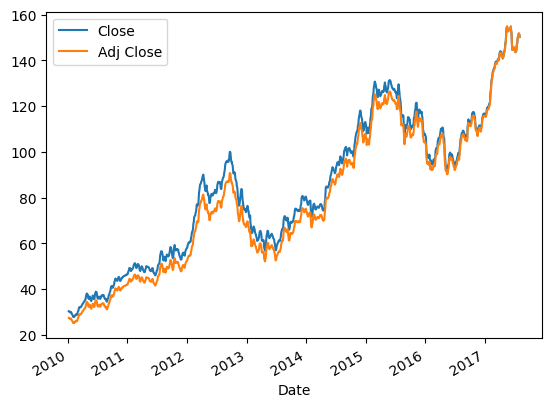

In [22]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

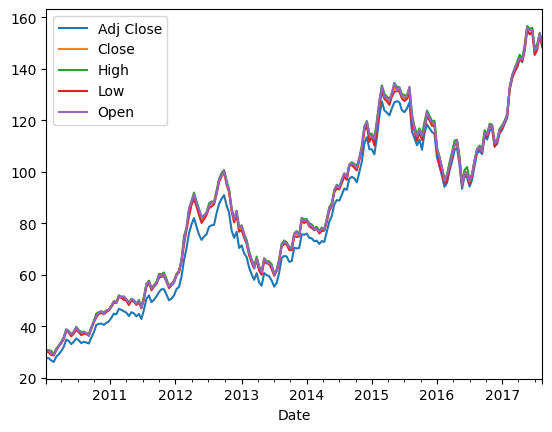

In [23]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

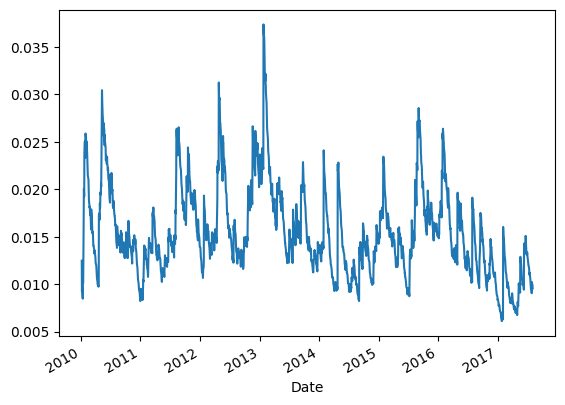

In [24]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [2]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.

    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [27]:
avocados = read_avocadata('2014', '2016')
avocados.head()

ConnectionError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Data from datos.gov.co

Data extracted from: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Internet-Fijo-Penetraci-n-Municipio/fut2-keu8

Number of subscribers with dedicated Internet access for each of Colombia's departments and municipalities, according to data reported by providers as of the last day of each quarter. Based on this data and on DANE projections for the population by municipality, department and in total in Colombia, the percentage of fixed Internet penetration for the period from 2015-4Q to July 2023 is shown below

In [67]:
import pandas as pd
datos =pd.read_csv("Internet.csv",decimal=',')
datos

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2021,1,5,ANTIOQUIA,5361,ITUANGO,1086,28142,0.0386
1,2022,2,27,CHOCO,27077,BAJO BAUDO,267,32640,0.0082
2,2021,3,68,SANTANDER,68077,BARBOSA,4058,32328,0.1255
3,2022,1,15,BOYACA,15759,SOGAMOSO,31469,134977,0.2331
4,2021,2,50,META,50568,PUERTO GAITAN,1434,44239,0.0324
...,...,...,...,...,...,...,...,...,...
13370,2022,2,68,SANTANDER,68533,PARAMO,189,4851,0.0390
13371,2022,3,17,CALDAS,17050,ARANZAZU,279,10735,0.0260
13372,2021,4,5,ANTIOQUIA,5541,PE�OL,7582,22008,0.3445
13373,2021,3,44,LA GUAJIRA,44560,MANAURE,466,93190,0.0050


In [74]:
datos.dtypes

AÑO                               int64
TRIMESTRE                         int64
COD_DEPARTAMENTO                  int64
DEPARTAMENTO                     object
COD_MUNICIPIO                     int64
MUNICIPIO                        object
No. ACCESOS FIJOS A INTERNET      int64
POBLACIÓN DANE                    int64
INDICE                          float64
dtype: object

In [73]:
datos["No. ACCESOS FIJOS A INTERNET"].min()

1

In [75]:
data["No. ACCESOS FIJOS A INTERNET"].max()

2294569

## Creating a plot bar

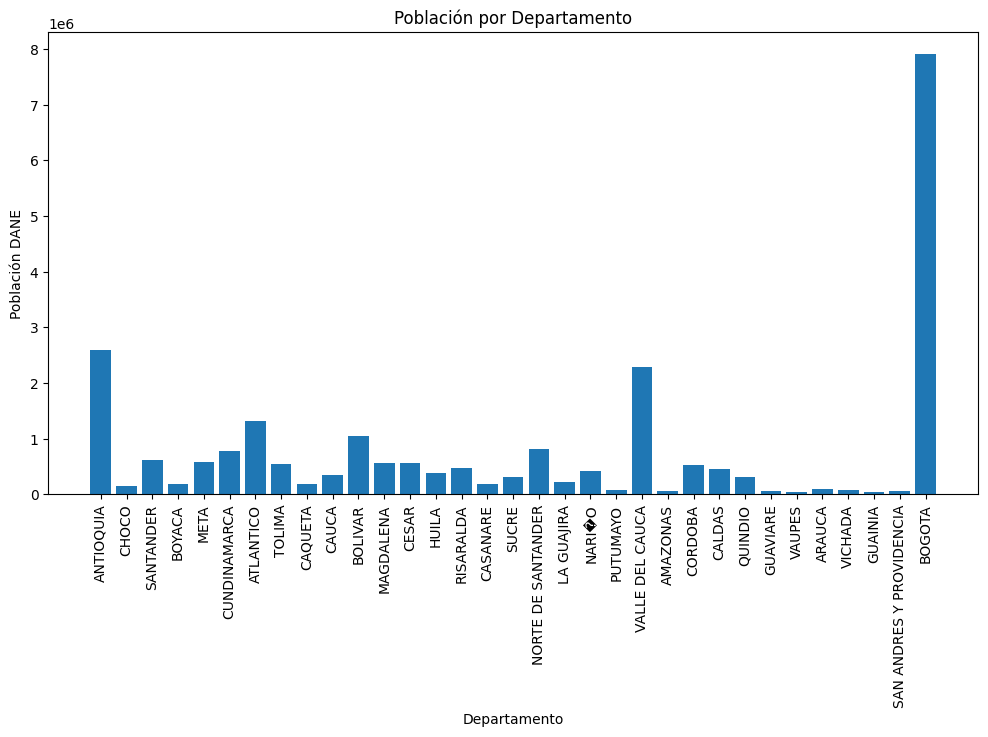

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Internet.csv')

plt.figure(figsize=(12, 6))
plt.bar(df['DEPARTAMENTO'], df['POBLACIÓN DANE'])
plt.xlabel('Departamento')
plt.ylabel('Población DANE')
plt.title('Población por Departamento')
plt.xticks(rotation=90)
plt.show()


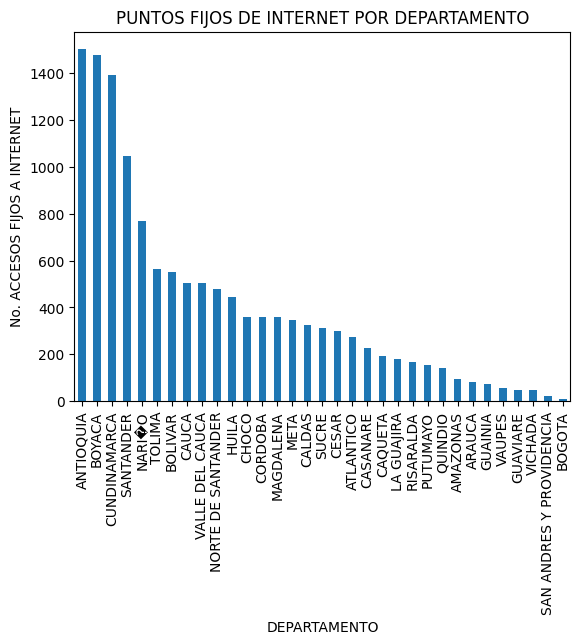

In [87]:
datos['DEPARTAMENTO'].value_counts().plot(kind='bar');

plt.xlabel('DEPARTAMENTO')
plt.ylabel('No. ACCESOS FIJOS A INTERNET')
plt.title("PUNTOS FIJOS DE INTERNET POR DEPARTAMENTO");

# Mostrar el histograma
plt.show()

## Creating a Plot Scatter

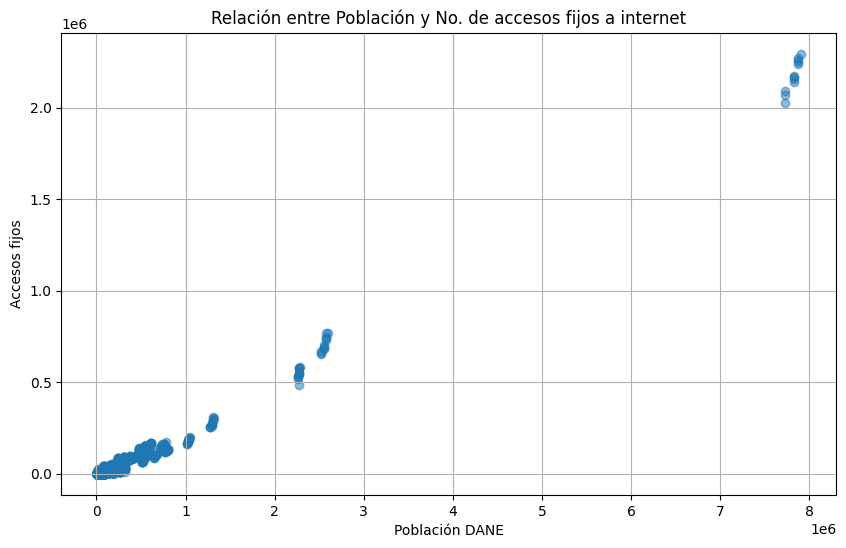

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(df['POBLACIÓN DANE'], df['No. ACCESOS FIJOS A INTERNET'], alpha=0.5)
plt.xlabel('Población DANE')
plt.ylabel('Accesos fijos')
plt.title('Relación entre Población y No. de accesos fijos a internet')
plt.grid(True)
plt.show()


## Creating a pie

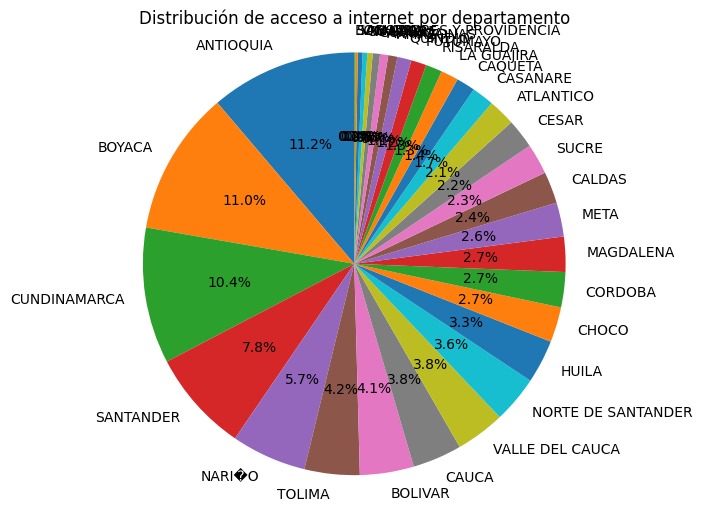

In [92]:
quarter_counts = df['DEPARTAMENTO'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de acceso a internet por departamento')
plt.axis('equal')
plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!